# Finding the BSP correction factors for all data

## Import important packages and set up file paths

In [24]:
import sys
import glob
import time
import os

import numpy as np
from scipy.io import readsav

# on my computer NX2 is not installed, I just import the code directly from the development directory
sys.path.append(os.path.abspath('../'))
import NX2
sys.path.append(os.path.abspath('.'))
from utils import date_from_filename

%matplotlib inline
from matplotlib import pyplot as plt

Set path to the local datafiles

In [25]:
db_path = '/home/moritz/Dropbox/'
db_path = '/melkor/d1/guenther/Dropbox/'

datapath = os.path.join(db_path, 'NX2/')
plotpath = os.path.join(db_path, 'NX2/2013/')

## Lusoria 2006

In [26]:
dat0651 = NX2.NX2Table(datapath + '2006/fifth-day-no-sail23-06-2006.00.csv', (23,06,2006), origin = (49.0164, 12.0285))
dat0651.add_rowing_old_format(datapath + '2006/Ruderschlaege.csv')
NX2.NX2.remove_Danube_current(dat0651)
dat0661 = NX2.NX2Table(datapath + '2006/sixth-day-with-sail24-06-2006.00.csv', (24,06,2006), origin = (49.0164, 12.0285))
dat0661.add_rowing_old_format(datapath + '2006/Ruderschlaege.csv')
NX2.NX2.remove_Danube_current(dat0661)

Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))


Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 54 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 54 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 55 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 55 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


In [27]:
schwaller = readsav(os.path.join(db_path, 'code/python/NX2/NX2/data', 'stromgeschwindigkeit.sav'))['strom']

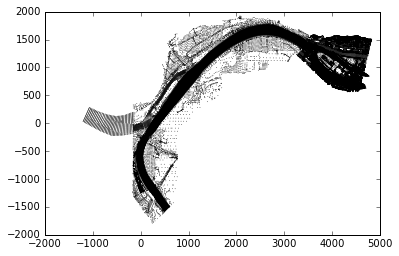

In [28]:
temp = plt.quiver(schwaller['x'][0], schwaller['y'][0], schwaller['vx'][0], schwaller['vy'][0])

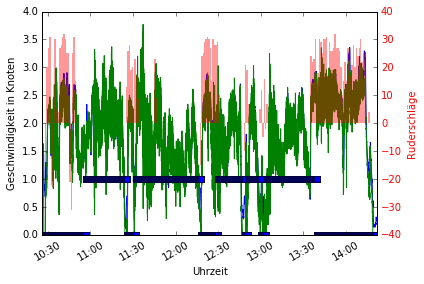

In [29]:
pl = dat0661.plot_speeds()

Seeing how good the blue and the green line agree in the plot above,
I think we can say that the BSP correction factor must be almost exactly one. In fact,
if I remember correctly, we actually took the value for the correction that the NX2 suggested and 
accepted them, thus making the correction factor 1 for the later days.

Below is a plot_course plot, but I also don't see any anomalies there:

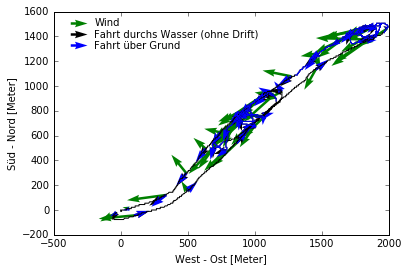

In [30]:
pl = dat0661.plot_course()

Beta: [ 0.93879498]
Beta Std Error: [ 0.00336639]
Beta Covariance: [[ 0.00037418]]
Residual Variance: 0.0302864823552
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


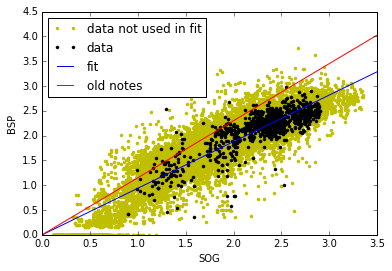

In [31]:
fit, ind = dat0661.fit_BSP_corr()
fit.pprint()
plt.plot(dat0661.SOG[~ind], dat0661.BSP[~ind],'y.', label = 'data not used in fit')
plt.plot(dat0661.SOG[ind], dat0661.BSP[ind],'k.', label = 'data')
plt.plot(plt.xlim(), fit.beta * plt.xlim(), label = 'fit')
plt.plot(plt.xlim(), 1.15 * np.array(plt.xlim()), 'r', label = 'old notes')
plt.xlabel('SOG')
plt.ylabel('BSP')
plt.legend(loc = 'upper left')

So, that is basically all consistent with a correction factor of $0.94 \approx 1$ (within 10% - 
I don't think that we'll get much better than that).

Now, let's do the same experiment on the other day with sailing data in 2006. All dates without
sailing need not be calibrated at all.

Beta: [ 0.8018716]
Beta Std Error: [ 0.00515346]
Beta Covariance: [[ 0.00061652]]
Residual Variance: 0.0430773185345
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


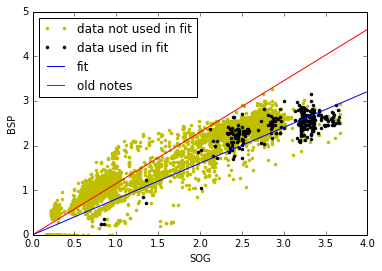

In [32]:
fit, ind = dat0651.fit_BSP_corr()
fit.pprint()
plt.plot(dat0651.SOG[~ind], dat0651.BSP[~ind],'y.', label = 'data not used in fit')
plt.plot(dat0651.SOG[ind], dat0651.BSP[ind],'k.', label = 'data used in fit')
plt.plot(plt.xlim(), fit.beta * plt.xlim(), label = 'fit')
plt.plot(plt.xlim(), 1.15 * np.array(plt.xlim()), 'r', label = 'old notes')
plt.xlabel('SOG')
plt.ylabel('BSP')
plt.legend(loc = 'upper left')

Now, $\beta = 0.8$  which is significantly less than the other day, but after the cuts there
is actually very little data left anyway. Here, I show the data that was not used in the fit
because is was taken during a time of gusty wind, in unfavourable wind angles etc. (see the
documentation of the fitting procedure for details) and most of this data also indicates a 
higher value for $\beta$ than fit. Thus, I conclude, that the values of $\beta$ might well
be compatible with what I have seen for the other day and I use 0.95 as the correction factor for all
2006 data.

## Victoria: Data from 2008

In [33]:
filelist = glob.glob(os.path.join(datapath, '2008', '*csv'))
filelist.sort()
rowfile08 = filelist.pop()  #alphabetically last file after sorting
#but let's check just to make sure.
print rowfile08

/melkor/d1/guenther/Dropbox/NX2/2008/Ruderschlaege.csv


In [34]:
dat08 = []
for f in filelist:
    data = NX2.NX2Table(f, date_from_filename(f))
    data.add_rowing_old_format(rowfile08)
    dat08.append(data)

Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column COG
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 57 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 57 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 57 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 57 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 28 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 28 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 28 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 28 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 199 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 199 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 199 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 199 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 85 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 85 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 85 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 85 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 29 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 29 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column COG
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 29 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 29 lines.
  

Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 216 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 216 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 215 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 215 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading NX2 table, which was exported with 1.05
Input data does not contain info on month and year.
Load rowing data
Load sailing data


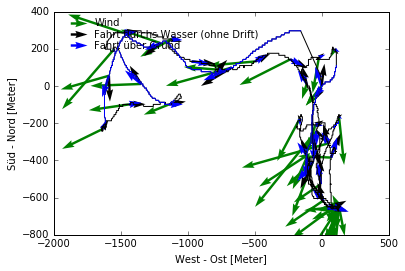

In [35]:
#check some random dataset
fig = dat08[5].plot_course()

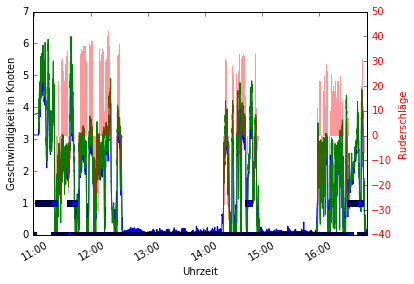

In [36]:
fig = dat08[5].plot_speeds()

Looks OK to me. At least, no errors are immidiately obvious, i.e. the rowing times line up with the times of the trip, sailing is in between rowing sections etc.

In [37]:
def fitplot_BSP(data, ax, titel = ''):
    fit, ind = data.fit_BSP_corr()
    ax.plot(data.SOG[~ind], data.BSP[~ind], 'y.', label = 'data not used for fit')
    ax.plot(data.SOG[ind], data.BSP[ind],'k.', label = 'data')
    ax.plot(plt.xlim(), fit.beta * plt.xlim(), label = 'fit')
    ax.set_title(titel + '$\\beta = ${0:4.2f}'.format(fit.beta[0]))

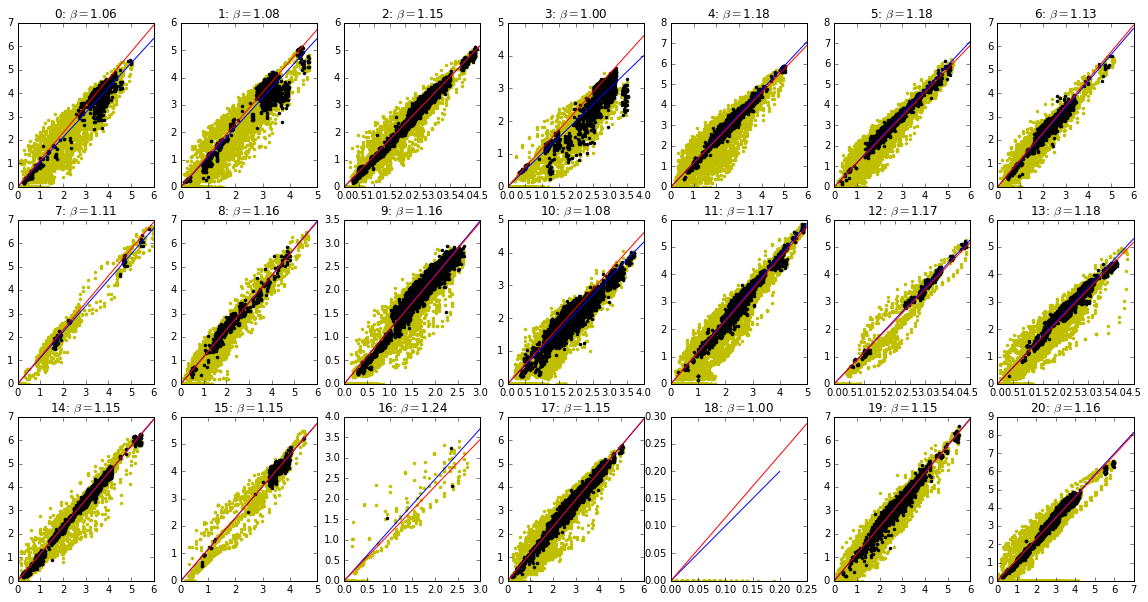

In [38]:
fig = plt.figure(figsize = (20,10))
for i, data in enumerate(dat08):
    ax = fig.add_subplot(3,7,i+1)
    fitplot_BSP(data, ax, titel = str(i)+': ')
    ax.plot(plt.xlim(), np.array([1.15]) * plt.xlim(), 'r', label = 'm = 1.15')

The plot above shows the SOG on the x-axis and the BSP on the y-axis for all days in 2008. Black dots are used in the fit, yellow dots are rejected, because e.g. they are recorded at time when the wind speed or the direction of the boat changed significantly or when the course-over-ground (COG) and the compass course (HDC) disagree. If COG and HDC are parallel and there is no current (as expected on a lake), then SOG and BSP should have the same value. If there is an angle between COG and HDC, then we boat is drifted sideways to some degree, which causes the BSP to measure only one component of the velocity vector. This differece is the drift, one of the parameters we seek to constrain with those measurements.


The blue line the best fit to the dataset from each day; the numerical value for $\beta$, the slope of the line, is show in the title of each panel. The red line plotted in all figures is a line with $\beta = 1.15$, which I propose to take for all measurements in 2008. In most plots, the fit value is virtually indistinguishable from 1.15, those with strong disagreements have either a very low number of datapoints (e.g. second and forth plot in last row) or the pattern of the black dots looks in some way inconsistent (first and third plot in first row).

The cloud of black points is always much tighther 

Below, I pick the third dataset with shows $\beta = 1.0\:$ and look at it in some more detail, because I suspect that this is a case where the log was not fully submerged, possibly one of those days with a lot of guests or a film crew.

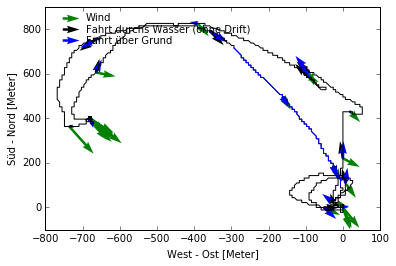

In [39]:
data = dat08[3]
fig = data.plot_course()

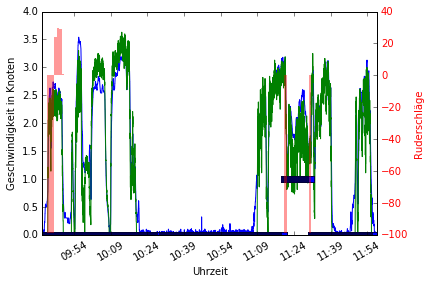

In [40]:
fig = data.plot_speeds()

In the SOG-BSP plot there is this off group of black dots that have SOG$ > 3.3$,but relatively low BSP. Let's find out what happend there.

In [41]:
ind33 = data.SOG > 3.3
ind33.sum()

74

In [42]:
data.datetime()[ind33]
dlt33 = data.where(ind33)
print dlt33.datetime()[[1,-1]]

[datetime.datetime(2008, 4, 17, 9, 55, 37)
 datetime.datetime(2008, 4, 17, 9, 56, 51)]


The time period in questions is only 70 s long, the BSP here is lower than it should be. Turing this time, the ship moved into a wind, going in a very tight loop. While I cannot reproduce exatly, what happened here, it is obvious form the SOG-BSP diagram that the conversion factor in this phase must be different from the usual values.

## Lusoria 2011

In [43]:
filelist = glob.glob(os.path.join(datapath, '2011', '*csv'))
filelist.sort()
hamburgtestfile = filelist.pop()
rowfile11 = filelist.pop()  #alphabetically last file after sorting
#but let's check just to make sure.
print hamburgtestfile, rowfile11

/melkor/d1/guenther/Dropbox/NX2/2011/Test_Hamburg_110415.00.csv /melkor/d1/guenther/Dropbox/NX2/2011/Ruderschlaege2011.csv


In [44]:
dat11 = []
for f in filelist:
    data = NX2.NX2Table(f, date_from_filename(f))
    data.add_rowing_old_format(rowfile11)
    dat11.append(data)

Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column COG
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 14 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 14 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 14 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 14 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 70 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 70 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 70 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 70 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LAT
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LON
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 5 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 5 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column DFT
Maximum data gap is 2 lines.
  v)) 

Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 8 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 8 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 8 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 8 lines.
  v))

Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 31 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 31 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column COG
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 31 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 31 lines.
  

Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column COG
Maximum data gap is 3 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column DFT
Maximum data gap is 3 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column SOG
Maximum data gap is 3 lines.
  v)) for g, v in itertools.groupby(index)

Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 8 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 9 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LAT
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LON
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 14 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 14 lines.
  v

Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LAT
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LON
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column DFT
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column SET
Maximum data gap is 1 lines.
  v))

Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:153: NX2InterpolationWarning: column TIME contains > 2 % nans. Interpolating ... contains more than 2% nans. No automatic interpolation performed.
  warn('TIME contains > 2 % nans. Interpolating ...', NX2InterpolationWarning)
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 203 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LAT
Maximum data gap is 4 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LON
Maximum data gap is 4 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contai

Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 5 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 5 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 5 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 5 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 75 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 75 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 75 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 75 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LAT
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LON
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2Interpolation

Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 15 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 15 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 15 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 15 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LAT
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LON
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2Interpolation

Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 19 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LAT
Maximum data gap is 6 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LON
Maximum data gap is 6 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column DFT
Maximum data gap is 8 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column SET
Maximum data gap is 6 lines.
  v)

/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:273: RuntimeWarning: invalid value encountered in less
  con2 = (np.abs(self.COG - self.HDC) < 15.)


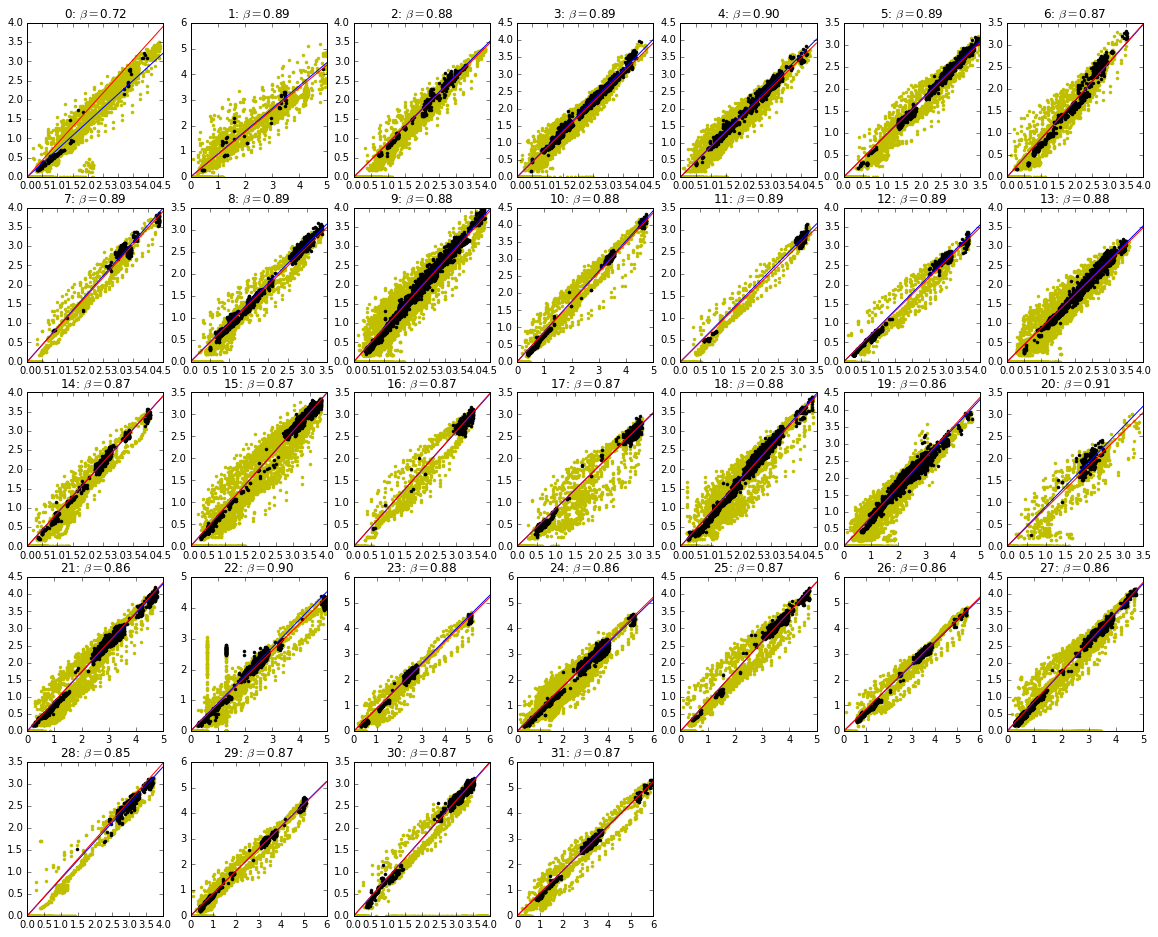

In [45]:
fig = plt.figure(figsize = (20,16))
for i, data in enumerate(dat11):
    ax = fig.add_subplot(5,7,i+1)
    fitplot_BSP(data, ax, titel = str(i)+': ')
    ax.plot(plt.xlim(), np.array([0.87]) * plt.xlim(), 'r', label = 'm = 0.87')

Expect for the first dataset (number 0), all datasets are beautifully consistent with $\beta = 0.87\;$. In all cases, the cloud of black points is extremly narrow. Some of the datasets are teken with the mast set, some are taken without, but apparently that makes no difference for the fitting of $\beta\;$.

## Victoria 2012

In [46]:
from glob import glob
filelist = glob(os.path.join(datapath, '2012', '*csv'))
filelist.sort()
testsystemfile = filelist.pop(0)
rowfile12 = filelist.pop()  #alphabetically last file after sorting
#but let's check just to make sure.
print testsystemfile, rowfile12

/melkor/d1/guenther/Dropbox/NX2/2012/20120514_TestSystem.00.csv /melkor/d1/guenther/Dropbox/NX2/2012/Ruderschlaege2012.csv


In [47]:
dat12 = []
for f in filelist:
    data = NX2.NX2Table(f, date_from_filename(f))
    data.add_rowing_old_format(rowfile12)
    dat12.append(data)

Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data
Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column COG
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 16 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 16 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 16 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 16 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


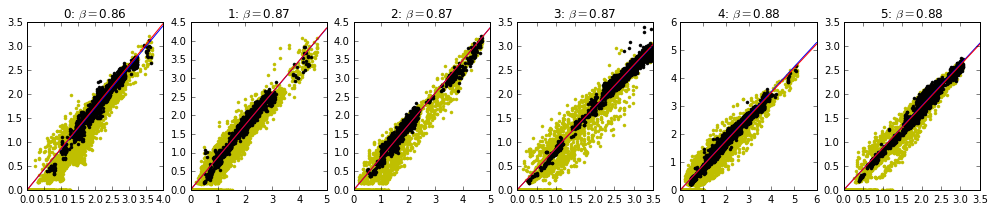

In [48]:
fig = plt.figure(figsize = (20,3))
for i, data in enumerate(dat12):
    ax = fig.add_subplot(1,7,i+1)
    fitplot_BSP(data, ax, titel = str(i)+': ')
    ax.plot(plt.xlim(), np.array([0.87]) * plt.xlim(), 'r', label = 'm = 0.87')

The same $\beta = 0.87\:$ that worked well in 2011 is again a very good fit to the data in 2012. This is not surprising, since we used exactly the same methods of fixing the log, in fact we can take that as confimations that the log is put in place in a very reproducable manner.

## Summary

So, from this analysis, we see that the following correction factors should be used for all the following analysis::

- Lusoria Regina 2006: $\beta = 0.95$
- Victoria 2008: $\beta = 1.18$
- Lusoria Rhenana 2011 and 2012: $\beta = 0.87$

### Plots for Book

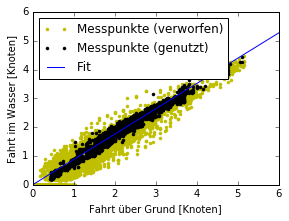

In [52]:
data = dat12[4]
fit, ind = data.fit_BSP_corr()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.plot(data.SOG[~ind], data.BSP[~ind], 'y.', label = 'Messpunkte (verworfen)')
ax.plot(data.SOG[ind], data.BSP[ind],'k.', label = 'Messpunkte (genutzt)')
ax.plot(plt.xlim(), fit.beta * plt.xlim(), label = 'Fit')
ax.legend(loc = 'upper left')
ax.set_xlabel(u'Fahrt über Grund [Knoten]')
ax.set_ylabel('Fahrt im Wasser [Knoten]')
fig.subplots_adjust(top=0.95, right=0.98, bottom=0.15)
fig.savefig(os.path.join(plotpath,'Logkalibration.pdf'), transparent=True)